In [1]:
# =========================================================
# IMPORT LIBRARIES AND LOAD DATASET
# =========================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

df = pd.read_csv("Human_Development_Index_Dataset.csv", encoding="latin1")


TASK 1: EXTRACT LATEST YEAR (2022)
Available years in dataset: [np.int64(1990), np.int64(1991), np.int64(1992), np.int64(1993), np.int64(1994), np.int64(1995), np.int64(1996), np.int64(1997), np.int64(1998), np.int64(1999), np.int64(2000), np.int64(2001), np.int64(2002), np.int64(2003), np.int64(2004), np.int64(2005), np.int64(2006), np.int64(2007), np.int64(2008), np.int64(2009), np.int64(2010), np.int64(2011), np.int64(2012), np.int64(2013), np.int64(2014), np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022)]
Latest year available: 2022
Number of countries in 2022: 206

TASK 2: DATA EXPLORATION

--- First 10 rows of 2022 data ---
     Unnamed: 0 iso3              country  year    hdi  life_expectancy  pop_millions     hdi_f     hdi_m  life_expec_f  life_expec_m  expec_yr_school  expec_yr_school_f  expec_yr_school_m  mean_yr_school  mean_yr_school_f  mean_yr_school_m  gross_inc_percap  gross_inc_percap_f  gross

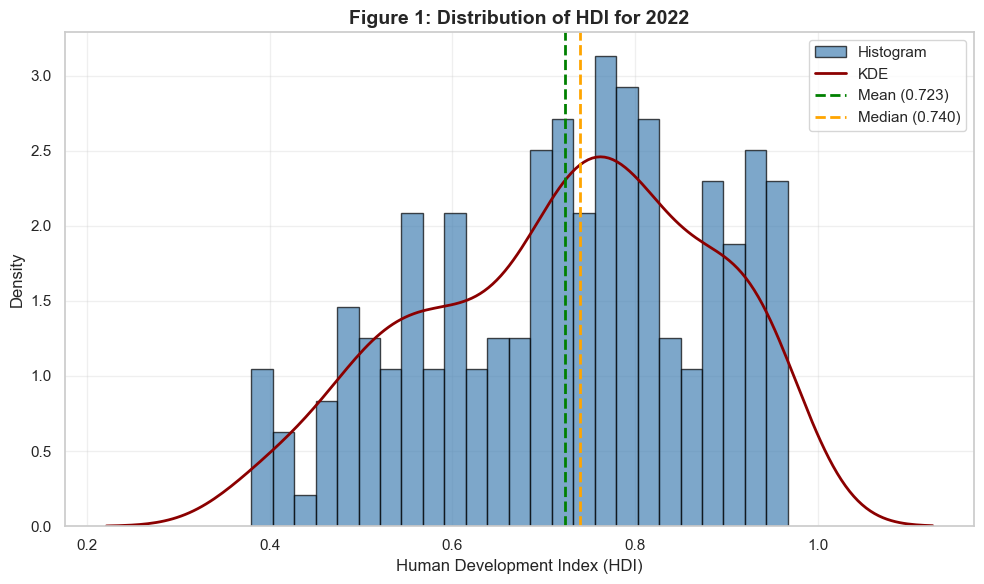

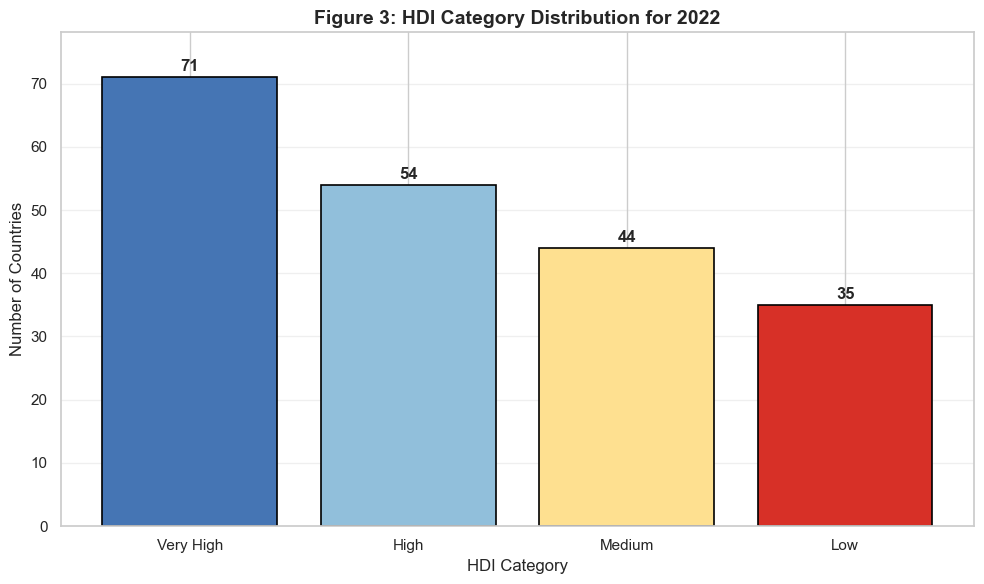


TASK 8: SAVING PROCESSED DATASET
Saved processed dataset as: HDI_category_added.csv


In [2]:
# =========================================================
# PROBLEM 1A – SINGLE YEAR HDI EXPLORATION (LATEST YEAR: 2022)
# =========================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# =========================================================
# TASK 1: Extract Latest Year
# =========================================================
print("=" * 50)
print("TASK 1: EXTRACT LATEST YEAR (2022)")
print("=" * 50)

# Identify unique years in dataset
unique_years = sorted(df['year'].unique())
print(f"Available years in dataset: {unique_years}")
print(f"Latest year available: {max(unique_years)}")

# Filter for 2022 data
hdi_2022_df = df[df['year'] == 2022].copy()
print(f"Number of countries in 2022: {len(hdi_2022_df)}")

# =========================================================
# TASK 2: Data Exploration
# =========================================================
print("\n" + "=" * 50)
print("TASK 2: DATA EXPLORATION")
print("=" * 50)

print("\n--- First 10 rows of 2022 data ---")
print(hdi_2022_df.head(10).to_string())

print(f"\n--- Dataset Shape ---")
print(f"Rows: {hdi_2022_df.shape[0]}, Columns: {hdi_2022_df.shape[1]}")

print("\n--- Column Names and Data Types ---")
print(hdi_2022_df.dtypes.to_string())

# =========================================================
# TASK 3: Missing Values & Data Cleaning
# =========================================================
print("\n" + "=" * 50)
print("TASK 3: MISSING VALUES & DATA CLEANING")
print("=" * 50)

print("\n--- Missing Values Before Cleaning ---")
missing_before = hdi_2022_df.isnull().sum()
print(missing_before[missing_before > 0])

# Convert numeric columns to proper types
numeric_cols = ['hdi', 'life_expectancy', 'gross_inc_percap', 'gender_development']
for col in numeric_cols:
    if col in hdi_2022_df.columns:
        hdi_2022_df[col] = pd.to_numeric(hdi_2022_df[col], errors='coerce')
        print(f"Converted {col} to numeric type")

# Check for duplicate rows
duplicates = hdi_2022_df.duplicated().sum()
print(f"\nNumber of duplicate rows found: {duplicates}")

# Remove duplicates
hdi_2022_df = hdi_2022_df.drop_duplicates()
print("Removed duplicate rows")

# Handle missing values in HDI column
print(f"\nMissing HDI values: {hdi_2022_df['hdi'].isnull().sum()}")
hdi_2022_df = hdi_2022_df.dropna(subset=['hdi'])
print("Dropped rows with missing HDI values")

print("\n--- Missing Values After Cleaning ---")
missing_after = hdi_2022_df.isnull().sum()
print(missing_after[missing_after > 0])

# =========================================================
# TASK 4: Basic Statistics
# =========================================================
print("\n" + "=" * 50)
print("TASK 4: BASIC STATISTICS")
print("=" * 50)

# Calculate descriptive statistics
hdi_stats = {
    'Count': len(hdi_2022_df['hdi']),
    'Mean': hdi_2022_df['hdi'].mean(),
    'Median': hdi_2022_df['hdi'].median(),
    'Standard Deviation': hdi_2022_df['hdi'].std(),
    'Minimum': hdi_2022_df['hdi'].min(),
    'Maximum': hdi_2022_df['hdi'].max(),
    '25th Percentile': hdi_2022_df['hdi'].quantile(0.25),
    '75th Percentile': hdi_2022_df['hdi'].quantile(0.75)
}

print("\n--- Descriptive Statistics of HDI (2022) ---")
for stat, value in hdi_stats.items():
    print(f"{stat}: {value:.3f}")

# Identify highest and lowest HDI countries
highest_hdi = hdi_2022_df.loc[hdi_2022_df['hdi'].idxmax()]
lowest_hdi = hdi_2022_df.loc[hdi_2022_df['hdi'].idxmin()]

print(f"\n--- Highest HDI Country ---")
print(f"Country: {highest_hdi['country']}")
print(f"HDI: {highest_hdi['hdi']:.3f}")

print(f"\n--- Lowest HDI Country ---")
print(f"Country: {lowest_hdi['country']}")
print(f"HDI: {lowest_hdi['hdi']:.3f}")

# =========================================================
# TASK 5: Filtering and Sorting
# =========================================================
print("\n" + "=" * 50)
print("TASK 5: FILTERING AND SORTING")
print("=" * 50)

# Filter for high HDI countries (> 0.800)
high_hdi_countries = hdi_2022_df[hdi_2022_df['hdi'] > 0.800].copy()
print(f"Number of countries with HDI > 0.800: {len(high_hdi_countries)}")

# Sort by GNI per capita (descending)
if 'gross_inc_percap' in high_hdi_countries.columns:
    high_hdi_sorted = high_hdi_countries.sort_values('gross_inc_percap', ascending=False)
    
    print("\n--- Top 10 High HDI Countries by GNI per Capita ---")
    top_10_table = high_hdi_sorted[['country', 'hdi', 'gross_inc_percap']].head(10).reset_index(drop=True)
    top_10_table.index = top_10_table.index + 1  # Start index from 1
    print(top_10_table.to_string())
else:
    print("Warning: 'gross_inc_percap' column not found in dataset")

# =========================================================
# TASK 6: HDI Category Column
# =========================================================
print("\n" + "=" * 50)
print("TASK 6: HDI CATEGORY COLUMN")
print("=" * 50)

# Define categorization function based on UNDP thresholds
def categorize_hdi(val):
    if pd.isna(val):
        return 'Unknown'
    elif val < 0.550:
        return 'Low'
    elif val < 0.700:
        return 'Medium'
    elif val < 0.800:
        return 'High'
    else:
        return 'Very High'

# Apply categorization
hdi_2022_df['HDI_Category'] = hdi_2022_df['hdi'].apply(categorize_hdi)

print("\n--- HDI Category Distribution ---")
category_counts = hdi_2022_df['HDI_Category'].value_counts()
print(category_counts.to_string())

# Calculate percentages
category_percent = (category_counts / len(hdi_2022_df) * 100).round(2)
print("\n--- HDI Category Percentages ---")
for category, percent in category_percent.items():
    print(f"{category}: {percent}%")

# =========================================================
# TASK 7: VISUALIZATIONS (FOR REPORT)
# =========================================================
print("\n" + "=" * 50)
print("TASK 7: GENERATING VISUALIZATIONS")
print("=" * 50)

# ---------------------------------------------------------
# Figure 1: Distribution of HDI for 2022 (Histogram + KDE)
# ---------------------------------------------------------
plt.figure(figsize=(10, 6))

# Histogram
plt.hist(hdi_2022_df['hdi'], bins=25, alpha=0.7, color='steelblue', 
         edgecolor='black', density=True, label='Histogram')

# KDE Plot
sns.kdeplot(hdi_2022_df['hdi'], color='darkred', linewidth=2, label='KDE')

# Add vertical lines for mean and median
plt.axvline(hdi_2022_df['hdi'].mean(), color='green', linestyle='--', 
            linewidth=2, label=f'Mean ({hdi_2022_df["hdi"].mean():.3f})')
plt.axvline(hdi_2022_df['hdi'].median(), color='orange', linestyle='--', 
            linewidth=2, label=f'Median ({hdi_2022_df["hdi"].median():.3f})')

plt.title('Figure 1: Distribution of HDI for 2022', fontsize=14, fontweight='bold')
plt.xlabel('Human Development Index (HDI)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig('HDI_Distribution_2022.png', dpi=300, bbox_inches='tight')
plt.show()

# ---------------------------------------------------------
# Figure 3: HDI Category Distribution for 2022 (Bar Chart)
# ---------------------------------------------------------
plt.figure(figsize=(10, 6))

# Define colors for each category
category_colors = {
    'Low': '#d73027',      # Red
    'Medium': '#fee090',   # Yellow
    'High': '#91bfdb',     # Light Blue
    'Very High': '#4575b4' # Dark Blue
}

# Get counts in correct order
categories = ['Very High', 'High', 'Medium', 'Low']
counts = [category_counts.get(cat, 0) for cat in categories]
colors = [category_colors.get(cat, 'gray') for cat in categories]

# Create bar chart
bars = plt.bar(categories, counts, color=colors, edgecolor='black', linewidth=1.2)

# Add count labels on top of bars
for bar, count in zip(bars, counts):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, 
             str(int(count)), ha='center', va='bottom', fontweight='bold')

plt.title('Figure 3: HDI Category Distribution for 2022', fontsize=14, fontweight='bold')
plt.xlabel('HDI Category', fontsize=12)
plt.ylabel('Number of Countries', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.ylim(0, max(counts) * 1.1)
plt.tight_layout()
plt.savefig('HDI_Category_Distribution_2022.png', dpi=300, bbox_inches='tight')
plt.show()



# =========================================================
# TASK 8: Save Processed Dataset
# =========================================================
print("\n" + "=" * 50)
print("TASK 8: SAVING PROCESSED DATASET")
print("=" * 50)

# Save the Final dataframe
hdi_2022_df.to_csv("HDI_category_added.csv", index=False)
print("Saved processed dataset as: HDI_category_added.csv")






hdi        8
country    0
year       0
dtype: int64
hdi        0
country    0
year       0
dtype: int64


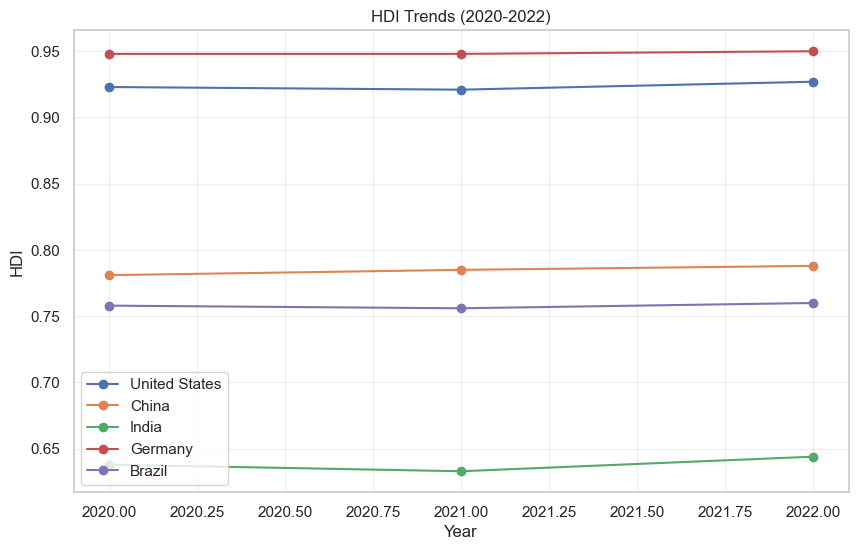

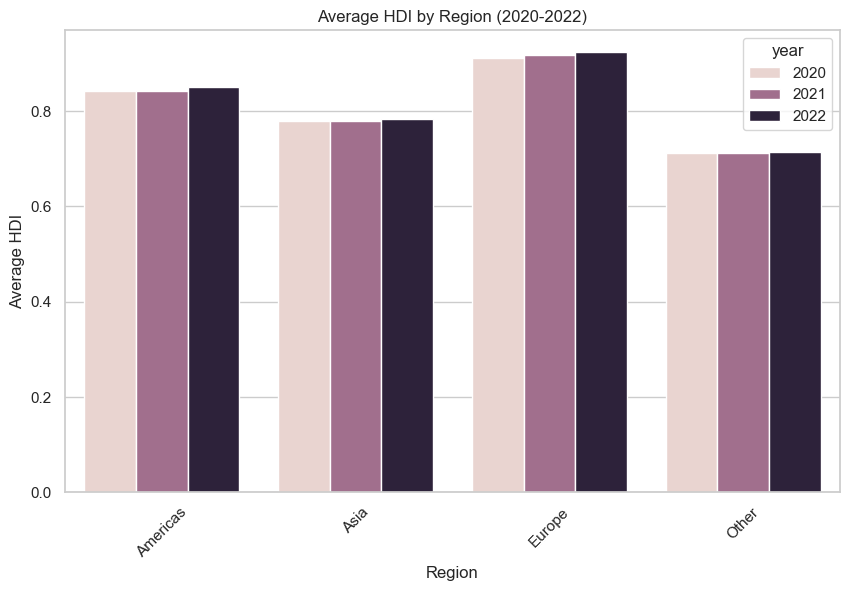

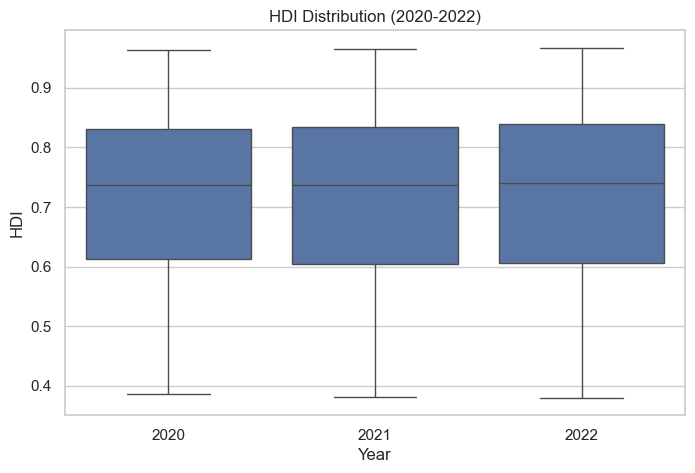

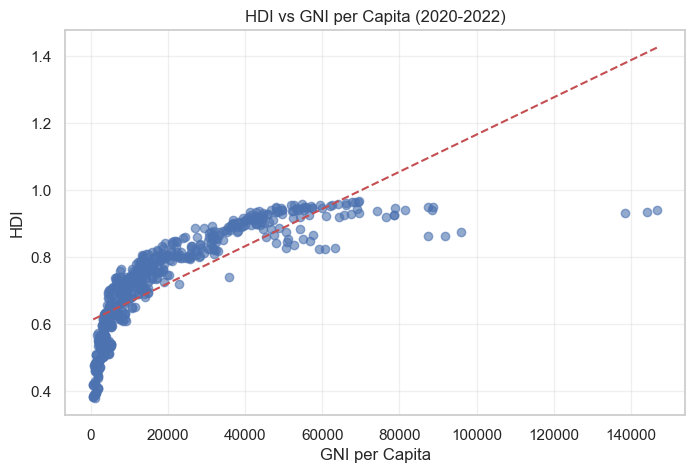

In [3]:
# =========================================================
# PROBLEM 1B – HDI VISUALIZATION AND TREND ANALYSIS (2020–2022)
# =========================================================

# TASK 1: Data Extraction and Saving
hdi_2020_22 = df[df['year'].isin([2020, 2021, 2022])].copy()
hdi_2020_22.to_csv("HDI_problem1B.csv", index=False)

# TASK 2: Data Cleaning
hdi_2020_22.replace("–", np.nan, inplace=True)

print(hdi_2020_22[['hdi', 'country', 'year']].isnull().sum())

numeric_cols = ['hdi', 'life_expectancy', 'gross_inc_percap', 'gender_development']
for col in numeric_cols:
    if col in hdi_2020_22.columns:
        hdi_2020_22[col] = pd.to_numeric(hdi_2020_22[col], errors='coerce')

hdi_2020_22_clean = hdi_2020_22.dropna(subset=['hdi', 'country', 'year'])
hdi_2020_22_clean = hdi_2020_22_clean.drop_duplicates()

print(hdi_2020_22_clean[['hdi', 'country', 'year']].isnull().sum())

# TASK 3A: Line Chart – HDI Trend (Country-Level)
plt.figure(figsize=(10,6))
countries = ['United States', 'China', 'India', 'Germany', 'Brazil']
for country in countries:
    temp = hdi_2020_22_clean[hdi_2020_22_clean['country'] == country]
    if not temp.empty:
        temp = temp.sort_values('year')
        plt.plot(temp['year'], temp['hdi'], marker='o', label=country)
plt.title('HDI Trends (2020-2022)')
plt.xlabel('Year')
plt.ylabel('HDI')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('HDI_Trend_Countries.png', dpi=300)
plt.show()

# TASK 3B: Bar Chart – Average HDI by Region
def assign_region(country):
    europe = ['Germany', 'France', 'United Kingdom', 'Italy', 'Spain']
    asia = ['China', 'India', 'Japan', 'South Korea']
    americas = ['United States', 'Canada', 'Brazil', 'Mexico']
    if country in europe: return 'Europe'
    elif country in asia: return 'Asia'
    elif country in americas: return 'Americas'
    else: return 'Other'

hdi_2020_22_clean['Region'] = hdi_2020_22_clean['country'].apply(assign_region)
region_avg = hdi_2020_22_clean.groupby(['Region', 'year'])['hdi'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=region_avg, x='Region', y='hdi', hue='year')
plt.title('Average HDI by Region (2020-2022)')
plt.xlabel('Region')
plt.ylabel('Average HDI')
plt.xticks(rotation=45)
plt.savefig('Average_HDI_by_Region.png', dpi=300)
plt.show()

# TASK 3C: Box Plot – HDI Distribution
plt.figure(figsize=(8,5))
sns.boxplot(data=hdi_2020_22_clean, x='year', y='hdi')
plt.title('HDI Distribution (2020-2022)')
plt.xlabel('Year')
plt.ylabel('HDI')
plt.savefig('HDI_Distribution_Boxplot.png', dpi=300)
plt.show()

# TASK 3D: Scatter Plot – HDI vs GNI per Capita
if 'gross_inc_percap' in hdi_2020_22_clean.columns:
    plt.figure(figsize=(8,5))
    plot_data = hdi_2020_22_clean.dropna(subset=['hdi', 'gross_inc_percap'])
    plt.scatter(plot_data['gross_inc_percap'], plot_data['hdi'], alpha=0.6)
    
    if len(plot_data) > 1:
        z = np.polyfit(plot_data['gross_inc_percap'], plot_data['hdi'], 1)
        p = np.poly1d(z)
        x_range = np.linspace(plot_data['gross_inc_percap'].min(), plot_data['gross_inc_percap'].max(), 100)
        plt.plot(x_range, p(x_range), "r--")
    
    plt.title('HDI vs GNI per Capita (2020-2022)')
    plt.xlabel('GNI per Capita')
    plt.ylabel('HDI')
    plt.grid(True, alpha=0.3)
    plt.savefig('HDI_vs_GNI_Scatter.png', dpi=300)
    plt.show()
else:
    print("GNI per Capita variable not available in the dataset.")


Composite Score ranking:        country  Composite_Score
4     Maldives         0.457156
7    Sri Lanka         0.354546
2       Bhutan         0.255605
1   Bangladesh         0.215311
3        India         0.211298
6     Pakistan         0.198051
5        Nepal         0.184773
0  Afghanistan         0.113948


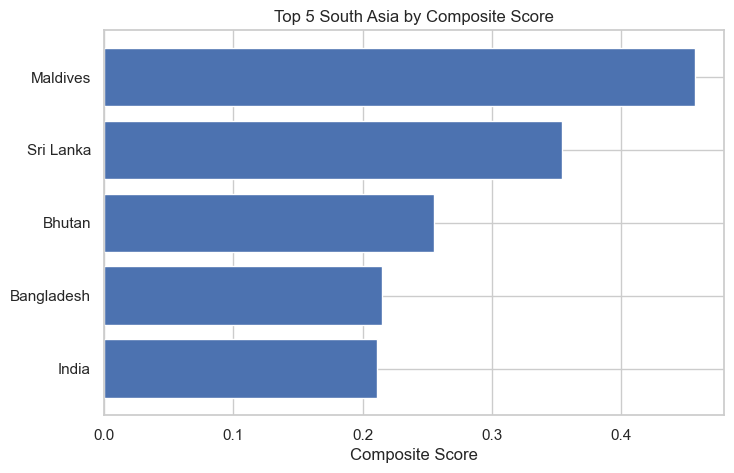

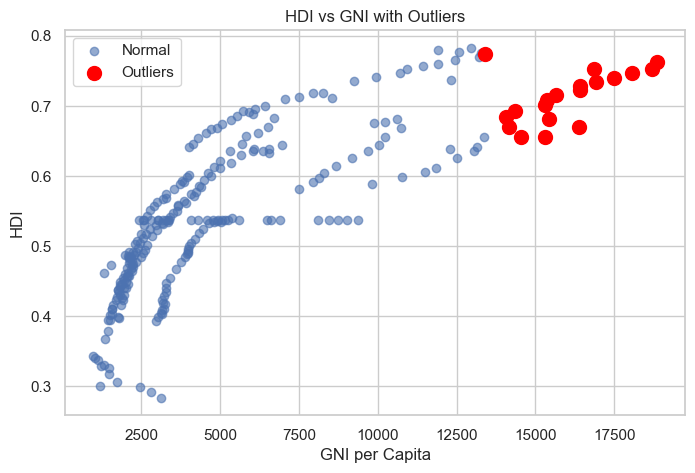

Correlation HDI-Life Expectancy: 0.9381237969438473
Correlation HDI-Gender Development: 0.7326194583444742


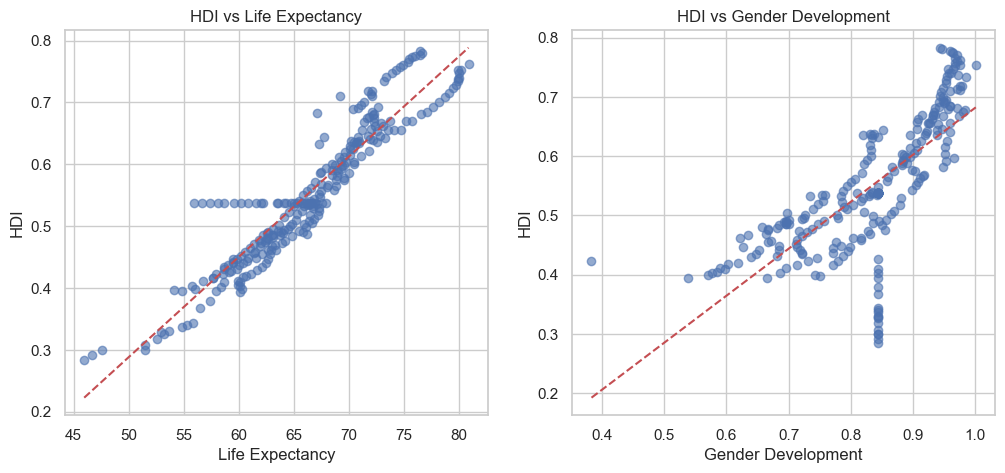

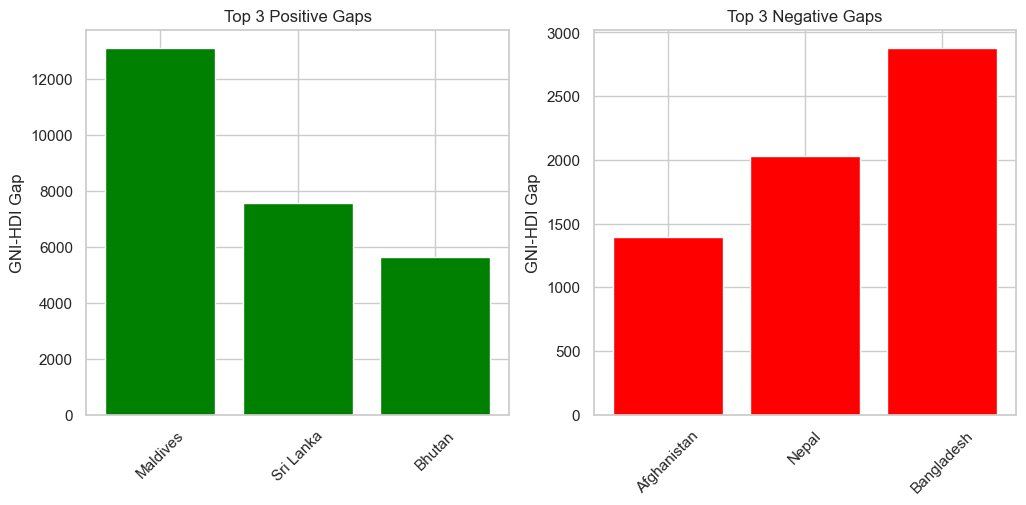

In [4]:
# =========================================================
# PROBLEM 2 – ADVANCED HDI EXPLORATION
# =========================================================

# TASK 1: Create South Asia Subset
south_asia = ["Afghanistan", "Bangladesh", "Bhutan", "India", 
              "Maldives", "Nepal", "Pakistan", "Sri Lanka"]
south_asia_df = df[df['country'].isin(south_asia)].copy()

numeric_cols = ['hdi', 'life_expectancy', 'gross_inc_percap', 'gender_development']
for col in numeric_cols:
    if col in south_asia_df.columns:
        south_asia_df[col] = pd.to_numeric(south_asia_df[col], errors='coerce')
        south_asia_df[col] = south_asia_df[col].fillna(south_asia_df[col].median())

south_asia_df.to_csv("HDI_SouthAsia.csv", index=False)

# TASK 2: Composite Development Score
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())

south_asia_df['Life_Index'] = normalize(south_asia_df['life_expectancy'])
south_asia_df['GNI_Index'] = normalize(south_asia_df['gross_inc_percap'])
south_asia_df['Composite_Score'] = 0.3 * south_asia_df['Life_Index'] + 0.3 * south_asia_df['GNI_Index']

composite_agg = south_asia_df.groupby('country').agg({
    'Composite_Score': 'mean',
    'hdi': 'mean'
}).reset_index().sort_values('Composite_Score', ascending=False)

print("Composite Score ranking:", composite_agg[['country', 'Composite_Score']])

plt.figure(figsize=(8,5))
top5 = composite_agg.head(5)
plt.barh(top5['country'], top5['Composite_Score'])
plt.xlabel('Composite Score')
plt.title('Top 5 South Asia by Composite Score')
plt.gca().invert_yaxis()
plt.savefig('SouthAsia_Composite_Score.png', dpi=300)
plt.show()

# TASK 3: Outlier Detection
def detect_outliers(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    return data[(data[col] < Q1 - 1.5*IQR) | (data[col] > Q3 + 1.5*IQR)]

outliers_hdi = detect_outliers(south_asia_df, 'hdi')
outliers_gni = detect_outliers(south_asia_df, 'gross_inc_percap')
all_outliers = pd.concat([outliers_hdi, outliers_gni]).drop_duplicates()

plt.figure(figsize=(8,5))
plt.scatter(south_asia_df['gross_inc_percap'], south_asia_df['hdi'], alpha=0.6, label='Normal')
if len(all_outliers) > 0:
    plt.scatter(all_outliers['gross_inc_percap'], all_outliers['hdi'], color='red', s=100, label='Outliers')
plt.xlabel('GNI per Capita')
plt.ylabel('HDI')
plt.title('HDI vs GNI with Outliers')
plt.legend()
plt.savefig('SouthAsia_Outliers.png', dpi=300)
plt.show()

# TASK 4: Exploring Metric Relationships
corr_life = south_asia_df['hdi'].corr(south_asia_df['life_expectancy'])
corr_gender = south_asia_df['hdi'].corr(south_asia_df['gender_development'])
print("Correlation HDI-Life Expectancy:", corr_life)
print("Correlation HDI-Gender Development:", corr_gender)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
ax1.scatter(south_asia_df['life_expectancy'], south_asia_df['hdi'], alpha=0.6)
z = np.polyfit(south_asia_df['life_expectancy'], south_asia_df['hdi'], 1)
p = np.poly1d(z)
ax1.plot(sorted(south_asia_df['life_expectancy']), p(sorted(south_asia_df['life_expectancy'])), 'r--')
ax1.set_title(f'HDI vs Life Expectancy')
ax1.set_xlabel('Life Expectancy')
ax1.set_ylabel('HDI')

ax2.scatter(south_asia_df['gender_development'], south_asia_df['hdi'], alpha=0.6)
z = np.polyfit(south_asia_df['gender_development'], south_asia_df['hdi'], 1)
p = np.poly1d(z)
ax2.plot(sorted(south_asia_df['gender_development']), p(sorted(south_asia_df['gender_development'])), 'r--')
ax2.set_title(f'HDI vs Gender Development')
ax2.set_xlabel('Gender Development')
ax2.set_ylabel('HDI')
plt.savefig('SouthAsia_HDI_Relationships.png', dpi=300)
plt.show()

# TASK 5: Gap Analysis
south_asia_df['GNI_HDI_Gap'] = south_asia_df['gross_inc_percap'] - south_asia_df['hdi'] * 1000
gap_agg = south_asia_df.groupby('country')['GNI_HDI_Gap'].mean().reset_index()

positive_gaps = gap_agg.sort_values('GNI_HDI_Gap', ascending=False).head(3)
negative_gaps = gap_agg.sort_values('GNI_HDI_Gap').head(3)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
ax1.bar(positive_gaps['country'], positive_gaps['GNI_HDI_Gap'], color='green')
ax1.set_title('Top 3 Positive Gaps')
ax1.set_ylabel('GNI-HDI Gap')
ax1.tick_params(axis='x', rotation=45)

ax2.bar(negative_gaps['country'], negative_gaps['GNI_HDI_Gap'], color='red')
ax2.set_title('Top 3 Negative Gaps')
ax2.set_ylabel('GNI-HDI Gap')
ax2.tick_params(axis='x', rotation=45)
plt.savefig('SouthAsia_GNI_HDI_Gaps.png', dpi=300)
plt.show()

PROBLEM 3: COMPARATIVE REGIONAL ANALYSIS
Saved regional subsets as CSV files

Mean HDI - South Asia: 0.640 (Std: 0.098)
Mean HDI - Middle East: 0.789 (Std: 0.141)
Middle East has higher average HDI by 0.149


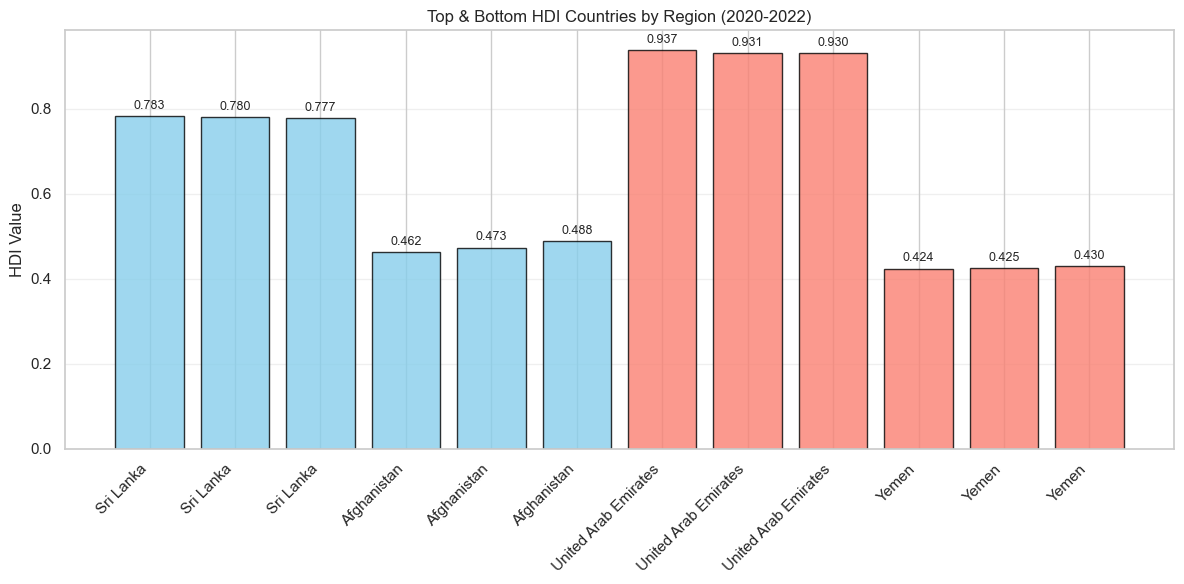


Greatest disparity in: GNI per Capita (386.1% difference)


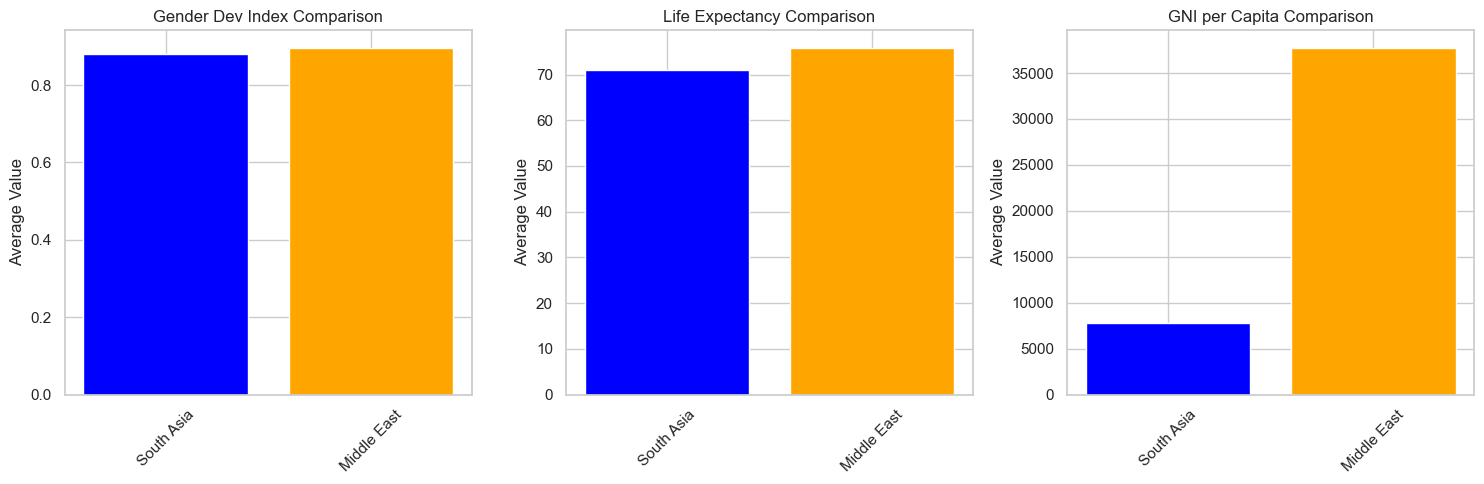


South Asia - Range: 0.321, CV: 15.4%
Middle East - Range: 0.513, CV: 17.9%
Middle East shows more HDI variation within region

Correlation with HDI:
South Asia - Gender Dev: 0.874, Life Expectancy: 0.939
Middle East - Gender Dev: 0.936, Life Expectancy: 0.933


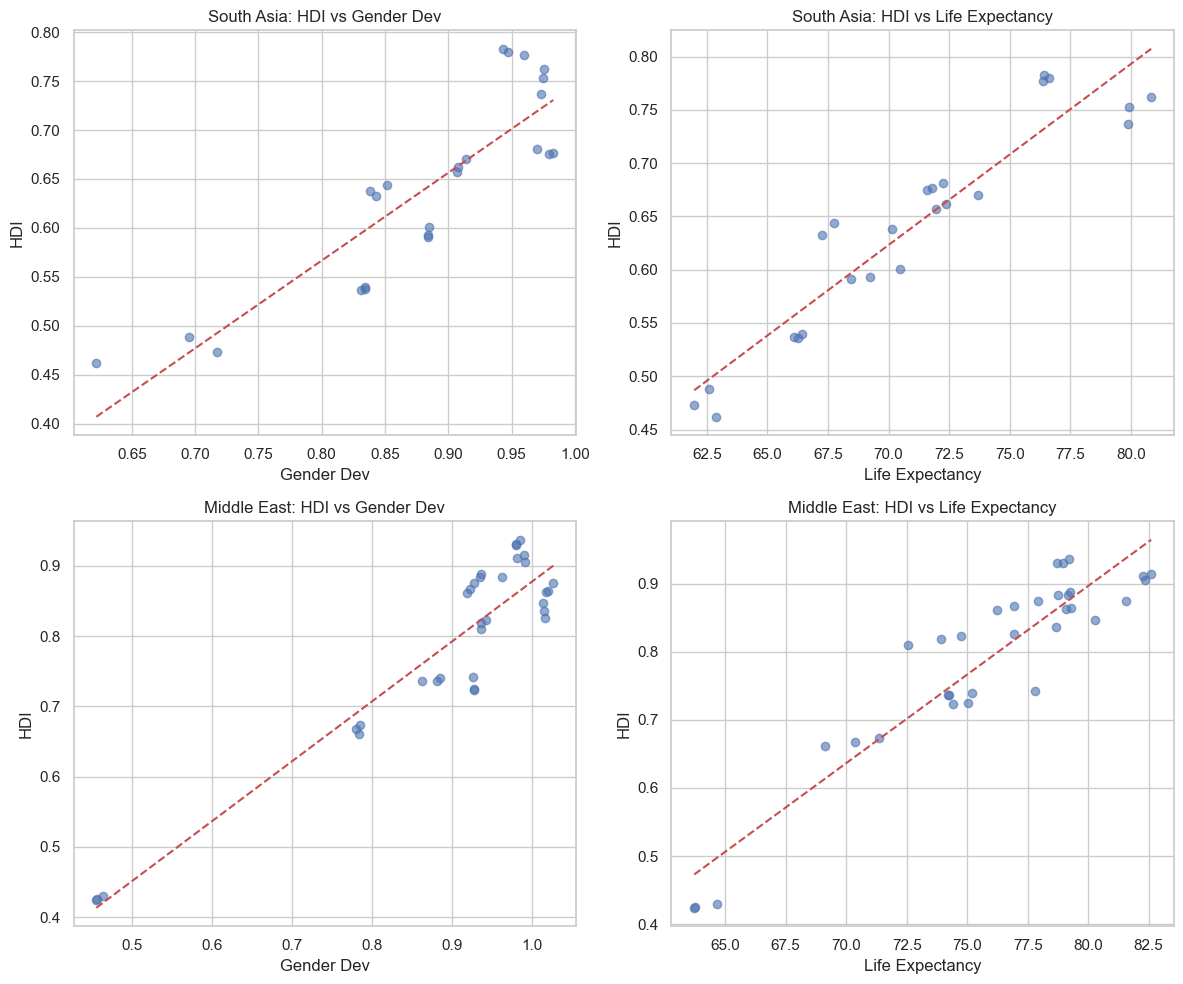


Outliers detected:
South Asia: 0 countries
Middle East: 3 countries


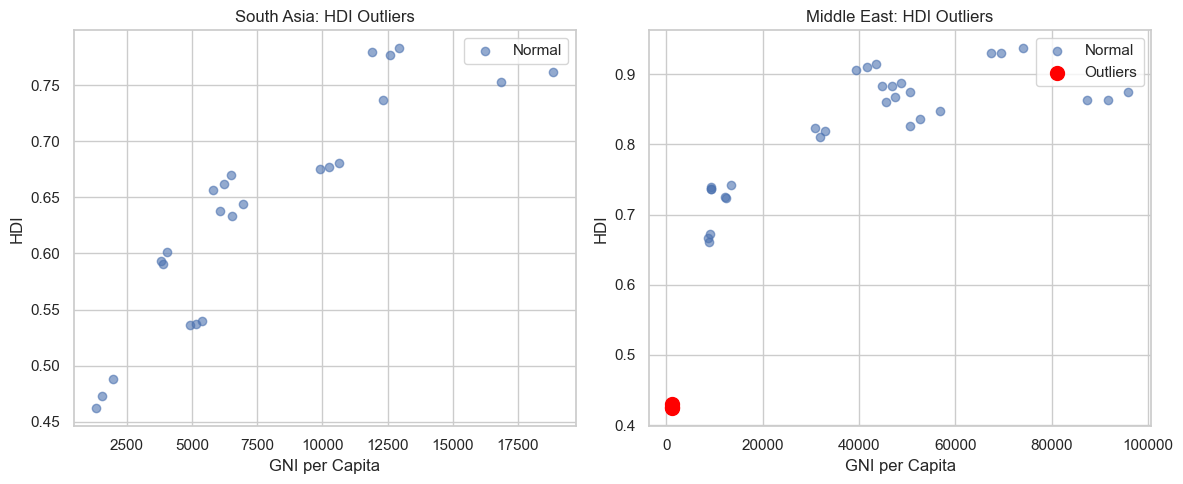


Problem 3 analysis complete


In [ ]:
# =========================================================
# PROBLEM 3 – COMPARATIVE REGIONAL ANALYSIS
# =========================================================
 

# =========================================================
# TASK 1: Create Regional Subsets
# =========================================================
print("=" * 60)
print("PROBLEM 3: COMPARATIVE REGIONAL ANALYSIS")
print("=" * 60)

# Load the cleaned dataset from Problem 1B
hdi_2020_22 = pd.read_csv("HDI_problem1B.csv")

# Define country lists
south_asia_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", 
                        "Maldives", "Nepal", "Pakistan", "Sri Lanka"]

middle_east_countries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", 
                         "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", 
                         "Syria", "United Arab Emirates", "Yemen"]

# Create subsets
south_asia_subset = hdi_2020_22[hdi_2020_22['country'].isin(south_asia_countries)].copy()
middle_east_subset = hdi_2020_22[hdi_2020_22['country'].isin(middle_east_countries)].copy()

# Add region labels
south_asia_subset['Region'] = 'South Asia'
middle_east_subset['Region'] = 'Middle East'

# Clean numeric columns
numeric_cols = ['hdi', 'life_expectancy', 'gross_inc_percap', 'gender_development']
for col in numeric_cols:
    if col in south_asia_subset.columns:
        south_asia_subset[col] = pd.to_numeric(south_asia_subset[col], errors='coerce')
        middle_east_subset[col] = pd.to_numeric(middle_east_subset[col], errors='coerce')

# Save subsets
south_asia_subset.to_csv("HDI_SouthAsia_2020_2022.csv", index=False)
middle_east_subset.to_csv("HDI_MiddleEast_2020_2022.csv", index=False)

print("Saved regional subsets as CSV files")

# =========================================================
# TASK 2: Descriptive Statistics
# =========================================================
sa_mean = south_asia_subset['hdi'].mean()
sa_std = south_asia_subset['hdi'].std()
me_mean = middle_east_subset['hdi'].mean()
me_std = middle_east_subset['hdi'].std()

print(f"\nMean HDI - South Asia: {sa_mean:.3f} (Std: {sa_std:.3f})")
print(f"Mean HDI - Middle East: {me_mean:.3f} (Std: {me_std:.3f})")
print(f"Middle East has higher average HDI by {me_mean - sa_mean:.3f}")

# =========================================================
# TASK 3: Top and Bottom Performers
# =========================================================
def get_top_bottom(data, n=3):
    top = data.sort_values('hdi', ascending=False).head(n)
    bottom = data.sort_values('hdi').head(n)
    return pd.concat([top, bottom])

sa_top_bottom = get_top_bottom(south_asia_subset)
me_top_bottom = get_top_bottom(middle_east_subset)

# Visualization
plt.figure(figsize=(12, 6))
combined = pd.concat([sa_top_bottom, me_top_bottom])
colors = ['skyblue' if region == 'South Asia' else 'salmon' for region in combined['Region']]

bars = plt.bar(range(len(combined)), combined['hdi'], color=colors, edgecolor='black', alpha=0.8)
plt.xticks(range(len(combined)), combined['country'], rotation=45, ha='right')
plt.ylabel('HDI Value')
plt.title('Top & Bottom HDI Countries by Region (2020-2022)')
plt.grid(axis='y', alpha=0.3)

# Add value labels
for bar, hdi_val in zip(bars, combined['hdi']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f'{hdi_val:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('Regional_Top_Bottom_Performers.png', dpi=300)
plt.show()

# =========================================================
# TASK 4: Metric Comparisons
# =========================================================
metrics = ['gender_development', 'life_expectancy', 'gross_inc_percap']
metric_names = ['Gender Dev Index', 'Life Expectancy', 'GNI per Capita']

# Calculate disparities
disparities = {}
for metric, name in zip(metrics, metric_names):
    sa_val = south_asia_subset[metric].mean()
    me_val = middle_east_subset[metric].mean()
    disparity = abs(me_val - sa_val) / sa_val * 100
    disparities[name] = disparity

max_disparity_metric = max(disparities, key=disparities.get)
print(f"\nGreatest disparity in: {max_disparity_metric} ({disparities[max_disparity_metric]:.1f}% difference)")

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, (metric, name) in enumerate(zip(metrics, metric_names)):
    region_avg = pd.DataFrame({
        'Region': ['South Asia', 'Middle East'],
        'Mean': [south_asia_subset[metric].mean(), middle_east_subset[metric].mean()]
    })
    
    axes[idx].bar(region_avg['Region'], region_avg['Mean'], color=['blue', 'orange'])
    axes[idx].set_title(f'{name} Comparison')
    axes[idx].set_ylabel('Average Value')
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('Metric_Comparisons.png', dpi=300)
plt.show()

# =========================================================
# TASK 5: HDI Disparity Analysis
# =========================================================
def calculate_dispersion(data):
    hdi_range = data['hdi'].max() - data['hdi'].min()
    cv = (data['hdi'].std() / data['hdi'].mean()) * 100
    return hdi_range, cv

sa_range, sa_cv = calculate_dispersion(south_asia_subset)
me_range, me_cv = calculate_dispersion(middle_east_subset)

print(f"\nSouth Asia - Range: {sa_range:.3f}, CV: {sa_cv:.1f}%")
print(f"Middle East - Range: {me_range:.3f}, CV: {me_cv:.1f}%")

if sa_cv > me_cv:
    print("South Asia shows more HDI variation within region")
else:
    print("Middle East shows more HDI variation within region")

# =========================================================
# TASK 6: Correlation Analysis
# =========================================================
sa_corr_gender = south_asia_subset['hdi'].corr(south_asia_subset['gender_development'])
sa_corr_life = south_asia_subset['hdi'].corr(south_asia_subset['life_expectancy'])
me_corr_gender = middle_east_subset['hdi'].corr(middle_east_subset['gender_development'])
me_corr_life = middle_east_subset['hdi'].corr(middle_east_subset['life_expectancy'])

print(f"\nCorrelation with HDI:")
print(f"South Asia - Gender Dev: {sa_corr_gender:.3f}, Life Expectancy: {sa_corr_life:.3f}")
print(f"Middle East - Gender Dev: {me_corr_gender:.3f}, Life Expectancy: {me_corr_life:.3f}")

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# South Asia: HDI vs Gender Dev
axes[0,0].scatter(south_asia_subset['gender_development'], south_asia_subset['hdi'], alpha=0.6)
z = np.polyfit(south_asia_subset['gender_development'], south_asia_subset['hdi'], 1)
p = np.poly1d(z)
axes[0,0].plot(sorted(south_asia_subset['gender_development']), p(sorted(south_asia_subset['gender_development'])), 'r--')
axes[0,0].set_title('South Asia: HDI vs Gender Dev')
axes[0,0].set_xlabel('Gender Dev')
axes[0,0].set_ylabel('HDI')

# South Asia: HDI vs Life Expectancy
axes[0,1].scatter(south_asia_subset['life_expectancy'], south_asia_subset['hdi'], alpha=0.6)
z = np.polyfit(south_asia_subset['life_expectancy'], south_asia_subset['hdi'], 1)
p = np.poly1d(z)
axes[0,1].plot(sorted(south_asia_subset['life_expectancy']), p(sorted(south_asia_subset['life_expectancy'])), 'r--')
axes[0,1].set_title('South Asia: HDI vs Life Expectancy')
axes[0,1].set_xlabel('Life Expectancy')
axes[0,1].set_ylabel('HDI')

# Middle East: HDI vs Gender Dev
axes[1,0].scatter(middle_east_subset['gender_development'], middle_east_subset['hdi'], alpha=0.6)
z = np.polyfit(middle_east_subset['gender_development'], middle_east_subset['hdi'], 1)
p = np.poly1d(z)
axes[1,0].plot(sorted(middle_east_subset['gender_development']), p(sorted(middle_east_subset['gender_development'])), 'r--')
axes[1,0].set_title('Middle East: HDI vs Gender Dev')
axes[1,0].set_xlabel('Gender Dev')
axes[1,0].set_ylabel('HDI')

# Middle East: HDI vs Life Expectancy
axes[1,1].scatter(middle_east_subset['life_expectancy'], middle_east_subset['hdi'], alpha=0.6)
z = np.polyfit(middle_east_subset['life_expectancy'], middle_east_subset['hdi'], 1)
p = np.poly1d(z)
axes[1,1].plot(sorted(middle_east_subset['life_expectancy']), p(sorted(middle_east_subset['life_expectancy'])), 'r--')
axes[1,1].set_title('Middle East: HDI vs Life Expectancy')
axes[1,1].set_xlabel('Life Expectancy')
axes[1,1].set_ylabel('HDI')

plt.tight_layout()
plt.savefig('Regional_Correlation_Analysis.png', dpi=300)
plt.show()

# =========================================================
# TASK 7: Outlier Detection
# =========================================================
def detect_outliers(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    return data[(data[col] < Q1 - 1.5*IQR) | (data[col] > Q3 + 1.5*IQR)]

sa_outliers = detect_outliers(south_asia_subset, 'hdi')
me_outliers = detect_outliers(middle_east_subset, 'hdi')

print(f"\nOutliers detected:")
print(f"South Asia: {len(sa_outliers)} countries")
print(f"Middle East: {len(me_outliers)} countries")

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

ax1.scatter(south_asia_subset['gross_inc_percap'], south_asia_subset['hdi'], alpha=0.6, label='Normal')
if len(sa_outliers) > 0:
    ax1.scatter(sa_outliers['gross_inc_percap'], sa_outliers['hdi'], color='red', s=100, label='Outliers')
ax1.set_title('South Asia: HDI Outliers')
ax1.set_xlabel('GNI per Capita')
ax1.set_ylabel('HDI')
ax1.legend()

ax2.scatter(middle_east_subset['gross_inc_percap'], middle_east_subset['hdi'], alpha=0.6, label='Normal')
if len(me_outliers) > 0:
    ax2.scatter(me_outliers['gross_inc_percap'], me_outliers['hdi'], color='red', s=100, label='Outliers')
ax2.set_title('Middle East: HDI Outliers')
ax2.set_xlabel('GNI per Capita')
ax2.set_ylabel('HDI')
ax2.legend()

plt.tight_layout()
plt.savefig('Regional_Outliers.png', dpi=300)
plt.show()

print("\n" + "=" * 60)
print("Problem 3 analysis complete")
print("=" * 60)